<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#本福特定律" data-toc-modified-id="本福特定律-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>本福特定律</a></span></li><li><span><a href="#公路堵车概率模型" data-toc-modified-id="公路堵车概率模型-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>公路堵车概率模型</a></span></li></ul></div>

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
a = np.random.randint(1,100,size=10000)
a

array([88, 96, 31, ..., 86, 17, 60])

[1069, 1115, 1106, 1105, 1140, 1124, 1095, 1135, 1111]


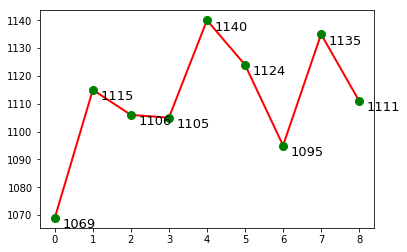

In [45]:
frequency = [0] * 9
for i in a:
    m = first_digital(i) - 1
    frequency[m] += 1
print(frequency)
plt.plot(frequency, 'r-', linewidth=2)
plt.plot(frequency, 'go', markersize=8)
for x,y in enumerate(frequency):
    plt.text(x+0.2, y, frequency[x], verticalalignment='top', fontsize=13)

# 本福特定律
本福特定律(本福德法则, Frank Benford)，又称第一数字定律，是指在实际生活得出的一组数据中，以1为首位数字出现的概率约为总数的三成；是直观想象1/9的三倍。

- 阶乘/素数数列/斐波那契数列首位
- 住宅地址号码
- 经济数据反欺诈
- 选举投票反欺诈

In [33]:
def first_digital(x):
    a = str(x)
    x = a[0]
    return int(x)

In [34]:
first_digital(2102)

2

[293, 176, 124, 101, 69, 87, 51, 51, 47]


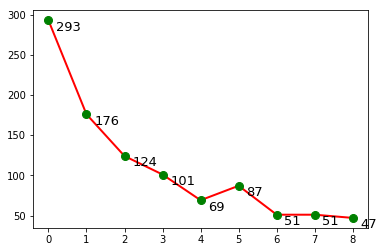

In [42]:
n = 1
frequency = [0] * 9
for i in range(1,1000):
    n *= i
    m = first_digital(n) - 1
    frequency[m] += 1
print(frequency)
plt.plot(frequency, 'r-', linewidth=2)
plt.plot(frequency, 'go', markersize=8)
for x,y in enumerate(frequency):
    plt.text(x+0.2, y, frequency[x], verticalalignment='top', fontsize=13)

[30, 18, 13, 7, 7, 7, 3, 10, 4]


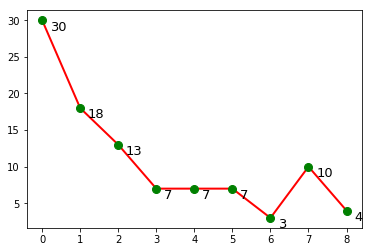

In [43]:
n = 1
frequency = [0] * 9
for i in range(1,100):
    n *= i
    m = first_digital(n) - 1
    frequency[m] += 1
print(frequency)
plt.plot(frequency, 'r-', linewidth=2)
plt.plot(frequency, 'go', markersize=8)
for x,y in enumerate(frequency):
    plt.text(x+0.2, y, frequency[x], verticalalignment='top', fontsize=13)

[2956, 1788, 1276, 963, 794, 715, 571, 510, 426]


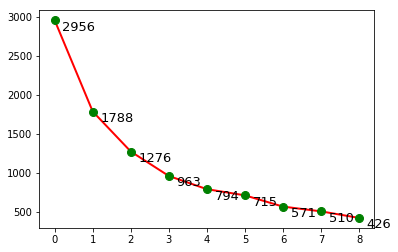

In [44]:
n = 1
frequency = [0] * 9
for i in range(1,10000):
    n *= i
    m = first_digital(n) - 1
    frequency[m] += 1
print(frequency)
plt.plot(frequency, 'r-', linewidth=2)
plt.plot(frequency, 'go', markersize=8)
for x,y in enumerate(frequency):
    plt.text(x+0.2, y, frequency[x], verticalalignment='top', fontsize=13)

# 公路堵车概率模型
Nagel-Schreckenberg交通流模型
- 路面上有N辆车，以不同的速度向前行驶，模拟堵车问题。有以下假设：
- 假设某辆车的当前速度是v。
- 若前方可见范围内没车，则它在下一秒的车速提高到v+1，直到达到规定的最高限速。
- 若前方有车，前车的距离为d，且d < v，则它下一秒的车速降低到d - 1 。
- 每辆车会以概率p随机减速v - 1。

In [51]:
from matplotlib.font_manager import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = 'SimHei'

np.random.seed(0)


def Run(path=5000, n=100, v0=60, ltv=120, p=0.3, times=3000):
    '''
    path = 5000.0 # 道路长度
    n = 100 # 车辆数目
    v0 = 60 # 初始速度
    ltv = 120 # 最大限速
    p = 0.3 # 减速概率
    times = 3000 # 模拟的时刻数目
    '''

    # x保存每辆车在道路上的位置，随机初始化
    x = np.random.rand(n) * path
    x.sort()
    # v保存每辆车的速度，初速度相同
    v = np.ones(n) * v0

    plt.figure(figsize=(5, 4), facecolor='w')
    # 模拟每个时刻
    for t in range(times):
        plt.scatter(x, [t] * n, s=1, c='k', alpha=0.05)
        # 模拟每辆车
        for i in range(n):
            # 计算当前车与前车的距离，注意是环形车道
            if x[(i + 1) % n] > x[i]:
                d = x[(i + 1) % n] - x[i]
            else:
                d = path - x[i] + x[(i + 1) % n]
            # 根据距离计算下一秒的速度
            if v[i] < d:
                if np.random.rand() > p:
                    v[i] += 1
                else:
                    v[i] -= 1
            else:
                v[i] = d - 1
        # 对速度进行限制
        v = v.clip(0, ltv)

        # 一秒后，车辆的位置发生了变化
        x += v
        # 注意是环形车道
        x = x % path

    # 展示
    plt.xlim(0, path)
    plt.ylim(0, times)
    plt.xlabel(u'车辆位置')
    plt.ylabel(u'模拟时间')
    plt.title(u'交通模拟(车道长度%d,车辆数%d,初速度%s,减速概率%s)' % (path, n, v0, p))
    # plt.tight_layout(pad=2)
    plt.show()

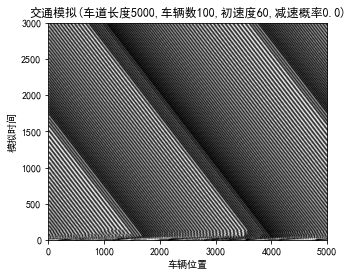

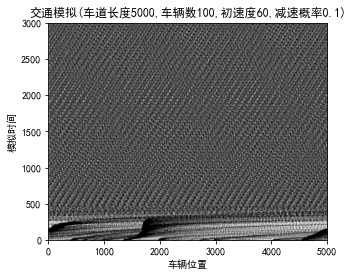

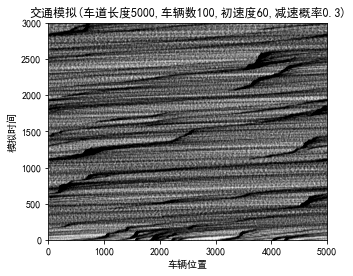

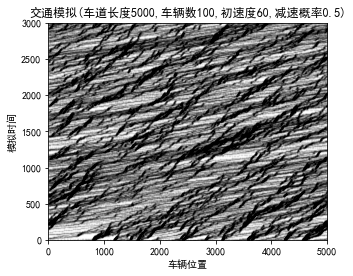

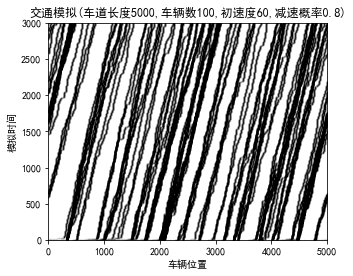

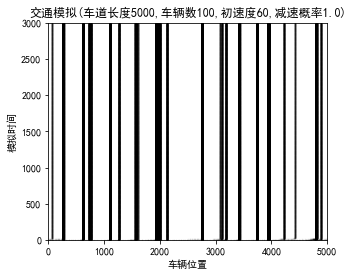

In [54]:
# Run(v0=0)
# Run(v0=20)
# Run(v0=40)
# Run(v0=60)

Run(p=0.0)
Run(p=0.1)
Run(p=0.3)
Run(p=0.5)
Run(p=0.8)
Run(p=1.0)